In [ ]:
!pip install pycountry

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd

df_co2 = pd.read_csv('gdrive/MyDrive/Data/co2_2.0.csv') #CO2
df_gdp = pd.read_csv('gdrive/MyDrive/Data/gdp_per_capita.csv') #GDP


,Country Name,Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24712.493263,26441.619936,26893.011506,28396.908423,28452.170615,29350.805019,30253.279358,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,147.612227,147.014904,156.189192,182.243917,162.347592,180.214908,190.845484,192.337167,...,1736.166560,1713.899299,1703.596298,1549.037940,1431.778723,1573.063386,1574.978648,1530.059177,1359.618224,NaN
2,Afghanistan,AFG,59.773234,59.860900,58.458009,78.706429,82.095307,101.108325,137.594298,160.898434,...,638.845852,624.315455,614.223342,556.007221,512.012778,516.679862,485.668419,494.179350,516.747871,NaN
3,Africa Western and Central,AFW,107.932233,113.081647,118.831107,123.442888,131.854402,138.526332,144.326212,128.582470,...,1965.118485,2157.481149,2212.853135,1894.310195,1673.835527,1613.473553,1704.139603,1777.918672,1710.073363,NaN
4,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5100.097027,5254.881126,5408.411700,4166.979833,3506.073128,4095.810057,3289.643995,2809.626088,1776.166868,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3410.859780,3704.784221,3902.676013,3520.766449,3759.560246,4009.380987,4384.048892,4416.108358,4346.637931,NaN
262,"Yemen, Rep.",YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1446.536472,1607.152173,1674.002572,1601.830063,1152.720966,964.264811,758.145242,NaN,NaN,NaN
263,South Africa,ZAF,443.009920,454.962013,473.011405,511.497364,548.996058,584.704163,621.220543,675.135345,...,8222.197279,7467.079185,6988.808739,6259.839681,5756.965741,6690.939847,7005.095413,6624.761865,5655.867654,NaN
264,Zambia,ZMB,232.188564,220.042067,212.578449,213.896759,242.384473,303.281740,343.373670,360.201239,...,1763.069442,1878.346811,1762.427817,1338.290927,1280.806543,1535.196574,1516.368371,1305.001031,985.132436,NaN


In [ ]:
nan_count = df_gdp.isna().sum().sum()
print("NaN in GDP dataset: " , nan_count)
nan_count2 = df_co2.isna().sum().sum()
print("NaN in CO2 dataset: " , nan_count2)

NaN in GDP dataset:  3655
NaN in CO2 dataset:  2352


In [ ]:
df_co2=pd.read_csv('gdrive/MyDrive/Data/co2_2.0.csv') #CO2 df
df=pd.melt(df_co2, 
            id_vars='Country Name', 
            value_vars=list(df_co2.columns[1:]),
            var_name='Year', 
            value_name='Co2')

df_co2= df[df['Co2'] != 0]

df_co2 = df_co2.sort_values(by =['Country Name','Year'] )
df_co2= df_co2.fillna(method='ffill')
df_co2

,Country Name,Year,Co2
2,Afghanistan,1960,0.046057
268,Afghanistan,1961,0.053589
534,Afghanistan,1962,0.073721
800,Afghanistan,1963,0.074161
1066,Afghanistan,1964,0.086174
...,...,...,...
14629,Zimbabwe,2014,0.894256
14895,Zimbabwe,2015,0.897598
15161,Zimbabwe,2016,0.783303
15427,Zimbabwe,2017,0.718570


In [ ]:
df_gdp = pd.read_csv('gdrive/MyDrive/Data/gdp_per_capita.csv') #GDP

df_gdp = df_gdp.drop(columns=["Code"])
#Rotate the df in order to set years as column
df=pd.melt(df_gdp, 
            id_vars='Country Name', 
            value_vars=list(df_gdp.columns[1:]),
            var_name='Year', 
            value_name='Gdp')


df_gdp_new = df[df['Gdp'] != 0] #Drop 0 values

df_gdp_new = df_gdp_new.sort_values(by =['Country Name','Year'] ) #Prettyfied dataframe

df_gdp_new['Gdp'] = (df_gdp_new['Gdp']/10000) #Unit of measure

df_gdp_new= df_gdp_new.fillna(method='ffill') #Fill nan values

df_gdp_new = df_gdp_new.dropna()  #Last Check on NaN values

df_gdp_new = df_gdp_new.dropna()  #Last Check on NaN values

df_gdp_new



,Country Name,Year,Gdp
2,Afghanistan,1960,0.005977
268,Afghanistan,1961,0.005986
534,Afghanistan,1962,0.005846
800,Afghanistan,1963,0.007871
1066,Afghanistan,1964,0.008210
...,...,...,...
15427,Zimbabwe,2017,0.123519
15693,Zimbabwe,2018,0.125464
15959,Zimbabwe,2019,0.131674
16225,Zimbabwe,2020,0.121451


In [ ]:
#Merge co2 and gdp dataset
df_final=pd.merge(df_co2,df_gdp_new,on=['Country Name','Year'],how="inner",indicator=True)
df_final = df_final.reset_index()

df_final = df_final.drop(columns=["index","_merge"])
df_final= df_final.dropna()
df_final


,Country Name,Year,Co2,Gdp
0,Afghanistan,1960,0.046057,0.005977
1,Afghanistan,1961,0.053589,0.005986
2,Afghanistan,1962,0.073721,0.005846
3,Afghanistan,1963,0.074161,0.007871
4,Afghanistan,1964,0.086174,0.008210
...,...,...,...,...
15632,Zimbabwe,2014,0.894256,0.143490
15633,Zimbabwe,2015,0.897598,0.144507
15634,Zimbabwe,2016,0.783303,0.146459
15635,Zimbabwe,2017,0.718570,0.123519


In [ ]:
df_final.to_csv('gdrive/MyDrive/Data/data_gdp_co2_with_groups.csv')

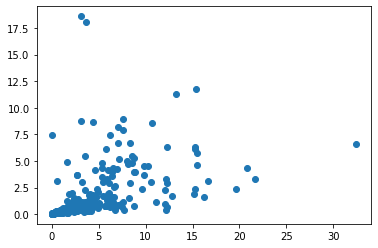

In [ ]:
from matplotlib import pyplot as plt

df_plot = df_final[df_final['Year']=="2018"]
plt.scatter(df_plot['Co2'], df_plot['Gdp'])
plt.show()